In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
#define state
class BMI2(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    category: str

In [3]:
#define your graph
graph = StateGraph(BMI2)

In [4]:
def cal_bmi(state: BMI2) -> BMI2:
    height = state['height_m']
    weight = state['weight_kg']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    return state

def label_bmi(state: BMI2) -> BMI2:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = "Underweight"
    elif 18.5 <= bmi < 25:
        state['category'] = "Normal"
    elif 25 <= bmi < 30:
        state['category'] = "Overweight"
    else:
        state['category'] = "obesity"

    return state
        

In [5]:
# define nodes
graph.add_node('calc_bmi', cal_bmi)
graph.add_node('label_bmi', label_bmi)


In [6]:
# add edges
graph.add_edge(START, 'calc_bmi')
graph.add_edge('calc_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)

In [7]:
#compile the graph
wf = graph.compile()

In [8]:
#execute
input = {'weight_kg': 80, "height_m": 1.73}
output = wf.invoke(input)
print(output)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


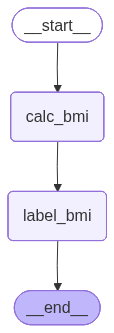

In [9]:
# to view your graph
from IPython.display import Image
Image(wf.get_graph().draw_mermaid_png())